# Analysis_Waterloo-Part3

We will finalize data cleansing in terms of cross-correlations and perform analysis using machine learning.

In [104]:
import scipy.io

import pandas as pd
import numpy as np
import statistics

import math
import seaborn as sns

import statistics

import re 
from scipy.stats import spearmanr

from platform import python_version
print(python_version())

# Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

from itertools import combinations_with_replacement, combinations

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

from scipy.stats.stats import pearsonr, kendalltau, spearmanr

3.7.4


In [105]:
data = pd.read_pickle("Part2_tmp")
mos = data ["MOS"]

In [106]:
feature_analyis = data.copy()
feature_analyis = feature_analyis.drop('content', axis = 1)
feature_analyis = feature_analyis.drop('motion', axis = 1)
feature_analyis = feature_analyis.drop('MOS', axis = 1)

feature_analyis = feature_analyis.drop('SI', axis = 1)
feature_analyis = feature_analyis.drop('TI', axis = 1)

In [107]:
feature_analyis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 450 entries, 0 to 449
Data columns (total 30 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   initial buffer time                           450 non-null    float64
 1   Rebuffer count                                450 non-null    int64  
 2   average duration of stalling event            450 non-null    float64
 3   mean(seqPSNR)                                 450 non-null    float64
 4   averageWeightedBitrate                        450 non-null    float64
 5   st_events_median                              450 non-null    float64
 6   st_events_max                                 450 non-null    float64
 7   median(dash_bitrate)                          450 non-null    float64
 8   mean(width)                                   450 non-null    float64
 9   mean(heigth)                                  450 non-null    flo

## Correlation analysis
Let's compose pairwise combinations of features. We have similar values such as mean and median, we have features that we constructed from the original data. We need to remove pairwise correlations, leaving those features that have a high level of association with MOS.

For this, it is necessary to assess the presence of a monotonic dependence. More details in the previous notebook.

In [108]:
feature_combs_2 = list(combinations(feature_analyis.columns, 2))

In [109]:
sp_list=[]
for l in range(len(feature_combs_2)):
    sp = kendalltau (feature_analyis[feature_combs_2[l][0]],feature_analyis[feature_combs_2[l][1]])
    sp_list.append ([sp[0], sp[1],feature_combs_2[l]])
    
sp_list.sort(key=lambda x: x[0])

In [110]:
for i in range(19):
    print (round(sp_list[-20:-1][i][0],4), sp_list[-20:-1][i][1], sp_list[-20:-1][i][2])

0.8294 2.634849110288425e-104 ('Rebuffer count', 'Rebuffer percentage')
0.8521 1.2795286497319761e-154 ('averageWeightedBitrate', 'mean(heigth)')
0.8641 4.372718486339422e-160 ('averageWeightedBitrate', 'mean(width)')
0.8667 1.378801523278692e-143 ('median(dash_bitrate)', 'mean(heigth)')
0.8678 1.1094013402471169e-164 ('averageWeightedBitrate', 'median(bitrates)')
0.8685 3.1962077798115902e-145 ('median(dash_bitrate)', 'mean(width)')
0.8744 9.844402252062678e-152 ('averageWeightedBitrate', 'median(dash_bitrate)')
0.9021 1.7226957277438947e-132 ('st_events_median', 'Rebuffer percentage')
0.9209 8.09480585394023e-138 ('st_events_median', 'st_events_max')
0.9294 1.5766165539188338e-140 ('average duration of stalling event', 'Rebuffer percentage')
0.9311 2.6110362978732615e-155 ('bitrate_max_pos_change', 'bitrate_mean_pos_change')
0.9313 4.572611995326041e-170 ('median(dash_bitrate)', 'median(bitrates)')
0.9331 1.6989743258882557e-131 ('Rebuffer count', 'freq_of_st')
0.9415 4.2408910650845

In [111]:
#Some double from previous notebooks
feature_analyis = feature_analyis.drop('Ratio on highest sequense quality layer1', axis = 1)

In [112]:
cols1 = ["average duration of stalling event"  ,
"st_events_median",
"freq_of_st",
"Rebuffer percentage"]

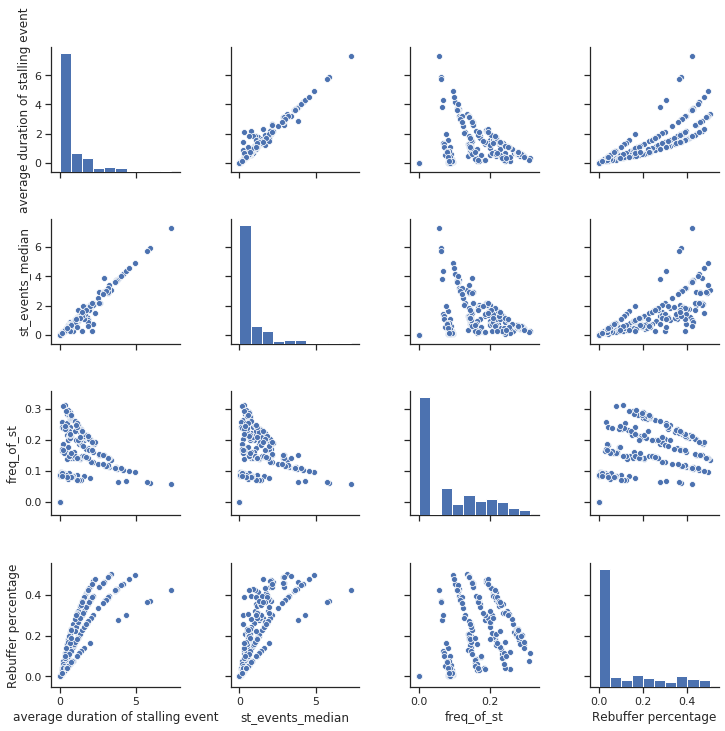

In [113]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(feature_analyis[cols1])

In [114]:
print(kendalltau(feature_analyis['st_events_median'], feature_analyis['average duration of stalling event']))
print("Ken MOS vs st_events_median", kendalltau(full['MOS'], full['st_events_median']))
print("Ken MOS vs average duration of stalling event",kendalltau(full['MOS'], feature_analyis['average duration of stalling event']))

KendalltauResult(correlation=0.9620645468359457, pvalue=2.6025557766158126e-150)
Ken MOS vs st_events_median KendalltauResult(correlation=-0.19994995310040575, pvalue=4.500243695544964e-09)
Ken MOS vs average duration of stalling event KendalltauResult(correlation=-0.20488908936746353, pvalue=1.8506215711850385e-09)


In [115]:
feature_analyis = feature_analyis.drop('st_events_median', axis = 1)

In [116]:
cols2 = ["median(dash_bitrate)",
"averageWeightedBitrate",
"median(bitrates)",
"Average Bitrate Swithcing magnitude",
"Ratio on highest video quality layer"]

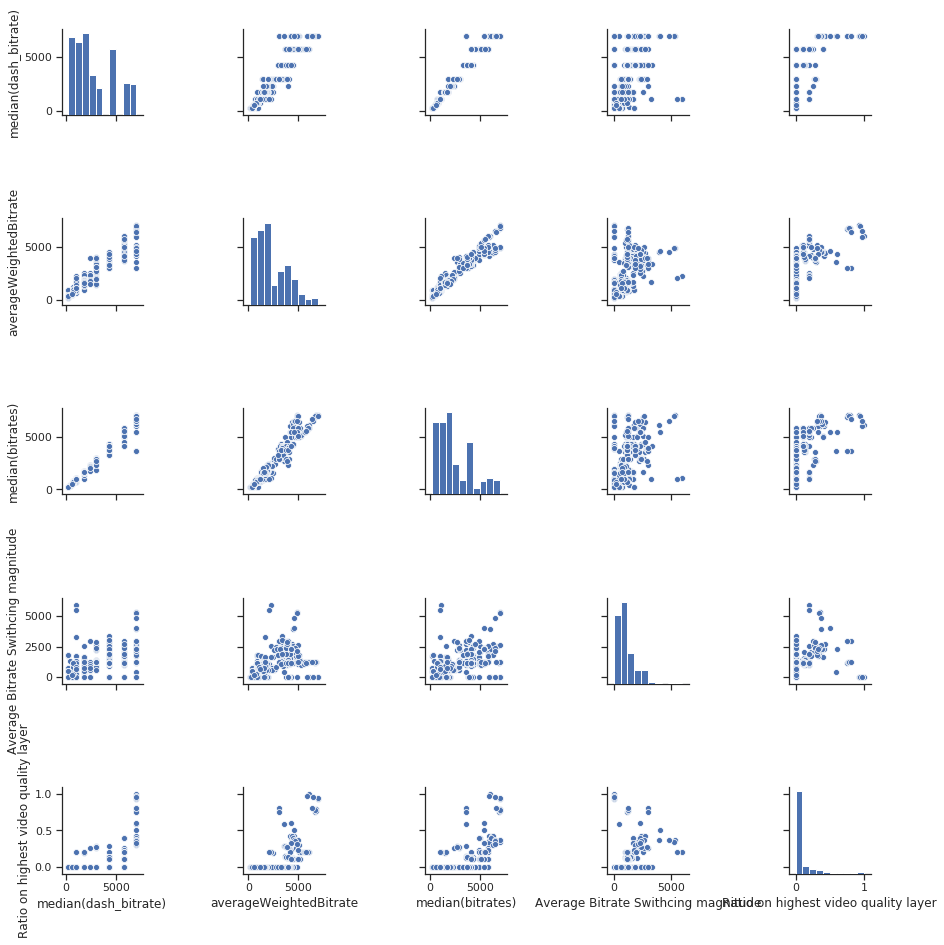

In [117]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(feature_analyis[cols2])

In [118]:
print(spearmanr(feature_analyis['averageWeightedBitrate'], feature_analyis['median(bitrates)']))
print(kendalltau(feature_analyis['averageWeightedBitrate'], feature_analyis['median(bitrates)']))
print("Sp MOS vs averageWeightedBitrate", spearmanr(full['MOS'], feature_analyis['averageWeightedBitrate']))
print("Sp MOS vs median(bitrates)",spearmanr(full['MOS'], feature_analyis['median(bitrates)']))

SpearmanrResult(correlation=0.972294267423252, pvalue=6.2728904035974064e-285)
KendalltauResult(correlation=0.86775806757884, pvalue=1.1094013402471169e-164)
Sp MOS vs averageWeightedBitrate SpearmanrResult(correlation=0.5117544744965612, pvalue=2.104233520927237e-31)
Sp MOS vs median(bitrates) SpearmanrResult(correlation=0.4815140280523848, pvalue=1.696255763027528e-27)


In [119]:
feature_analyis = feature_analyis.drop('median(bitrates)', axis = 1)

In [120]:
print(spearmanr(feature_analyis['averageWeightedBitrate'], feature_analyis['median(dash_bitrate)']))
print(kendalltau(feature_analyis['averageWeightedBitrate'], feature_analyis['median(dash_bitrate)']))
print("Sp MOS vs averageWeightedBitrate", spearmanr(full['MOS'], feature_analyis['averageWeightedBitrate']))
print("Sp MOS vs median(dash_bitrate)",spearmanr(full['MOS'], feature_analyis['median(dash_bitrate)']))
print("Ken MOS vs averageWeightedBitrate", kendalltau(full['MOS'], full['averageWeightedBitrate']))
print("Ken MOS vs median(dash_bitrate)",kendalltau(full['MOS'], feature_analyis['median(dash_bitrate)']))

SpearmanrResult(correlation=0.9653196706403047, pvalue=1.9906448645198773e-263)
KendalltauResult(correlation=0.8743614509580975, pvalue=9.844402252062678e-152)
Sp MOS vs averageWeightedBitrate SpearmanrResult(correlation=0.5117544744965612, pvalue=2.104233520927237e-31)
Sp MOS vs median(dash_bitrate) SpearmanrResult(correlation=0.5082603827181552, pvalue=6.231969246255368e-31)
Ken MOS vs averageWeightedBitrate KendalltauResult(correlation=0.36118921785116015, pvalue=2.4475126014154054e-30)
Ken MOS vs median(dash_bitrate) KendalltauResult(correlation=0.38226369560493734, pvalue=1.8056039735401786e-30)


As we see, there is a defference between scores of Kendall and Spearman RCC

In [121]:
feature_analyis = feature_analyis.drop('median(dash_bitrate)', axis = 1)
#feature_analyis = feature_analyis.drop('averageWeightedBitrate', axis = 1)

## Resolution
Let's create somtrhing like average resolution. To be honest, the area of the image depends on the attitude of the parties and, in general, on the service.
In addition, there may be black stripes down and above.
It would be most correct to consider this as a categorical feature and use, for instance, OneHot encoding.
But you can also use the area. We have no non-standard relationship of the parties.

In [122]:
feature_analyis["Average Resolution"] = np.nan
for index, row in feature_analyis.iterrows():
    
    value = int (row['mean(width)'])* int(row['mean(heigth)'])
    feature_analyis.at[index, 'Average Resolution'] = value
    
    
print(spearmanr(feature_analyis['Average Resolution'], mos))
print(kendalltau(feature_analyis['Average Resolution'], mos))

SpearmanrResult(correlation=0.5496612948600036, pvalue=6.911935566770868e-37)
KendalltauResult(correlation=0.3987142907869551, pvalue=8.596143861642501e-36)


In [123]:
feature_analyis = feature_analyis.drop('mean(width)', axis = 1)
feature_analyis = feature_analyis.drop('mean(heigth)', axis = 1)

In [124]:
feature_analyis.columns

Index(['initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_mean_pos_change',
       'bitrate_mean_neg_change', 'freq_of_st', 'Bitrate switch count',
       'freq_of_sw', 'Rebuffer percentage', 'dash_change_count',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on highest video quality layer',
       'Ratio on sequense quality layer max/2', 'Constant_bitrate',
       'Average Resolution'],
      dtype='object')

I want to drop "Ratio on highest video quality layer", because we have the same feature with much higher correlation level

In [125]:
print(spearmanr(feature_analyis['Ratio on highest video quality layer'], mos))

SpearmanrResult(correlation=0.11714824112078281, pvalue=0.012891760630344676)


In [126]:
feature_analyis = feature_analyis.drop('Ratio on highest video quality layer', axis = 1)

And I want to drop non-nomalized feature 'dash_change_count'

In [127]:
feature_analyis = feature_analyis.drop('dash_change_count', axis = 1)

## Numerical and Categorical data analysis 

In [128]:
feature_analyis.columns

Index(['initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_mean_pos_change',
       'bitrate_mean_neg_change', 'freq_of_st', 'Bitrate switch count',
       'freq_of_sw', 'Rebuffer percentage',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'Constant_bitrate',
       'Average Resolution'],
      dtype='object')

In [129]:
numerical_subset = pd.concat([feature_analyis, data["SI"]], axis = 1)
numerical_subset = pd.concat([numerical_subset, data["TI"]], axis = 1)
numerical_subset = numerical_subset.drop('Constant_bitrate', axis = 1)

In [132]:
# Select the categorical columns
categorical_subset = data[['content', 'motion', "Constant_bitrate"]]

In [134]:
data_all = pd.concat([numerical_subset, mos], axis = 1)

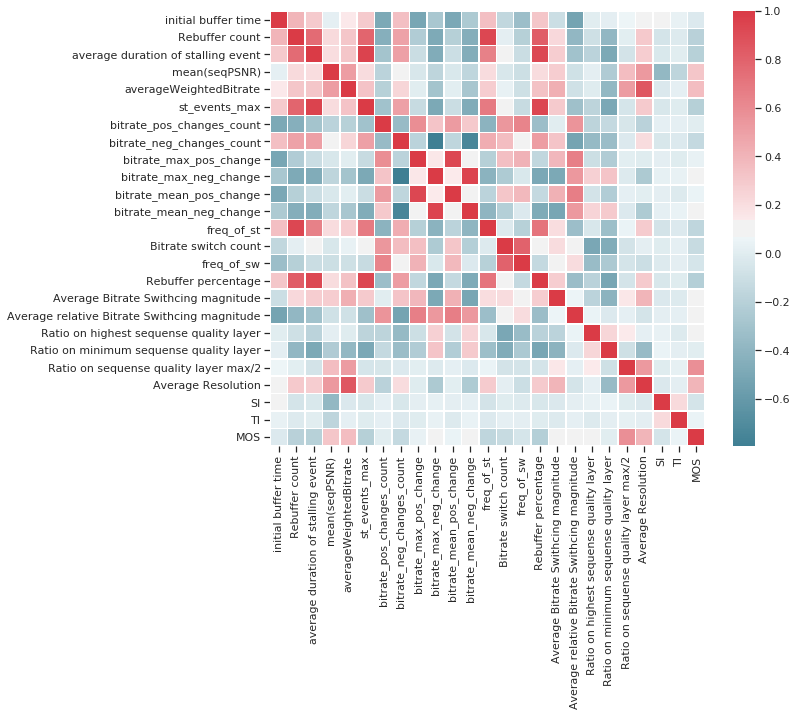

In [135]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = data.corr(method="spearman")
corr = data_all.corr(method="kendall")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, linewidths=.5)

# How important is categorical data?
Let's apply Kruskal-Wallis H-test

In [140]:
from scipy.stats import kruskal
def kruskal_method(a, b):
    v = kruskal(a, b)
    return v[0]

In [137]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
categorical_subset["content"] = le.fit_transform(categorical_subset["content"].astype(str))

categorical_subset["motion"] = le.fit_transform(categorical_subset["motion"].astype(str))

/home/ksant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ksant/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [139]:
cat_intro = pd.concat([categorical_subset, mos], axis = 1)

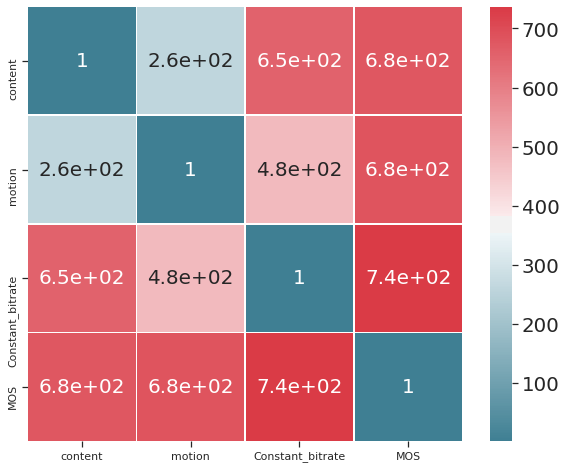

In [141]:
f, ax = plt.subplots(figsize=(10, 8))
#corr = data.corr(method="spearman")
corr = cat_intro.corr(method=kruskal_method)
sns.set(font_scale=1.8)
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, linewidths=.5, annot=True, annot_kws={"size": 20})

# Nominal data
Let's loot at nominal data - Constant Bitrate and Content. The common way to calculate correlation is applying Biserial correlation coefficient. Or Cramer V... Or wthatever A lot of problems, when you have more thatn 2 nominal categories

So we will use a novel universal corralation coeffifient [phik](https://phik.readthedocs.io/en/latest/phik.html)

Publication: https://arxiv.org/abs/1811.11440

In [142]:
import phik

interval columns not set, guessing: ['content', 'motion', 'Constant_bitrate', 'MOS']
interval columns not set, guessing: ['content', 'motion', 'Constant_bitrate', 'MOS']
interval columns not set, guessing: ['content', 'motion', 'Constant_bitrate', 'MOS']
interval columns not set, guessing: ['content', 'motion', 'Constant_bitrate', 'MOS']
interval columns not set, guessing: ['content', 'motion', 'Constant_bitrate', 'MOS']


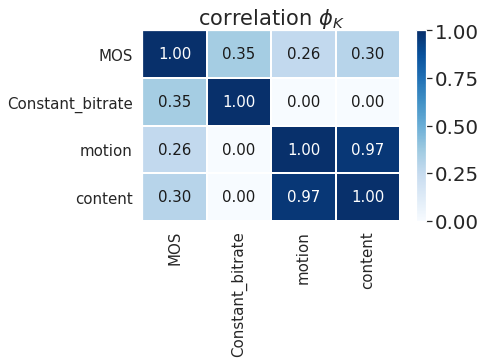

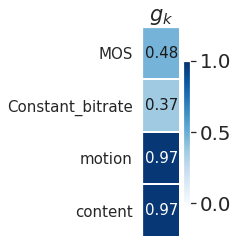

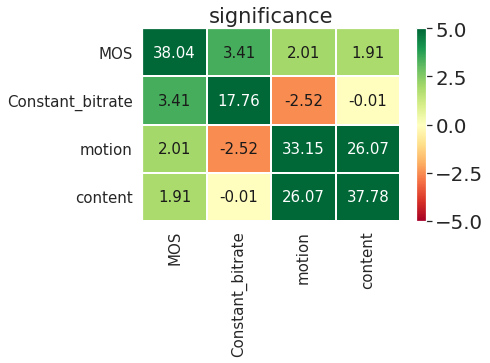

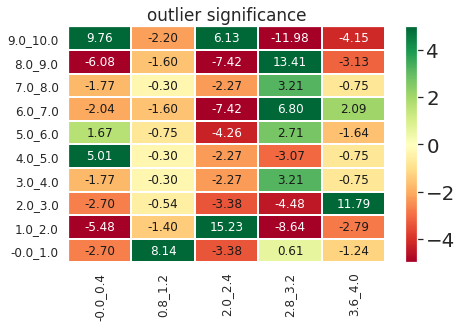

(                   content    motion  Constant_bitrate       MOS
 content           1.000000  0.969738          0.000000  0.298892
 motion            0.969738  1.000000          0.000000  0.262580
 Constant_bitrate  0.000000  0.000000          1.000000  0.353167
 MOS               0.298892  0.262580          0.353167  1.000000,
 array([[0.97098932],
        [0.97022519],
        [0.37264507],
        [0.47595833]]),
                     content     motion  Constant_bitrate        MOS
 content           37.777880  26.073782         -0.007514   1.912245
 motion            26.073782  33.152101         -2.524793   2.012677
 Constant_bitrate  -0.007514  -2.524793         17.762295   3.410757
 MOS                1.912245   2.012677          3.410757  38.036570,
 {'content:motion':           -0.0_0.4   0.8_1.2    2.0_2.4    2.8_3.2    3.6_4.0
  -0.0_1.0 -2.699745  8.136785  -3.384963   0.609655  -1.237022
  1.0_2.0  -5.479182 -1.398974  15.227477  -8.642668  -2.792505
  2.0_3.0  -2.699745 -0

In [145]:
from phik import resources, report

df = cat_intro
df.head()

# Pearson's correlation matrix between numeric variables (pandas functionality)
df.corr()

# get the phi_k correlation matrix between all variables
df.phik_matrix()

# get global correlations based on phi_k correlation matrix
df.global_phik()

# get the significance matrix (expressed as one-sided Z)
# of the hypothesis test of each variable-pair dependency
df.significance_matrix()

# show the normalized residuals of each variable-pair
df.outlier_significance_matrices()

# generate a phik correlation report and save as test.pdf
report.correlation_report(df, pdf_file_name='phik.pdf')

In [146]:
data_all = pd.concat([numerical_subset, categorical_subset, mos], axis = 1)

In [147]:
data_all.columns

Index(['initial buffer time', 'Rebuffer count',
       'average duration of stalling event', 'mean(seqPSNR)',
       'averageWeightedBitrate', 'st_events_max', 'bitrate_pos_changes_count',
       'bitrate_neg_changes_count', 'bitrate_max_pos_change',
       'bitrate_max_neg_change', 'bitrate_mean_pos_change',
       'bitrate_mean_neg_change', 'freq_of_st', 'Bitrate switch count',
       'freq_of_sw', 'Rebuffer percentage',
       'Average Bitrate Swithcing magnitude',
       'Average relative Bitrate Swithcing magnitude',
       'Ratio on highest sequense quality layer',
       'Ratio on minimum sequense quality layer',
       'Ratio on sequense quality layer max/2', 'Average Resolution', 'SI',
       'TI', 'content', 'motion', 'Constant_bitrate', 'MOS'],
      dtype='object')

In [148]:
data_all.to_pickle("Part3_tmp")

# Next

We are starting experiments with machine laeaning